In [ ]:
pip install pandas matplotlib seaborn openpyxl


In [ ]:
import pandas as pd

# Load the Excel file, skipping the first few rows and setting the correct header
file_path = '/content/M&CI Intern Case Study - Data 1.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, skiprows=4)  # Skip the first 4 rows to get to the actual data

# Preview the data to see how it looks now
print(df.head())

# Set the correct column names if necessary (adjust this based on your data preview)
df.columns = ['BRAND', 'Volume Sales 2024', 'Volume Sales 2023']

# Fill missing values (assuming missing sales mean no sales)
df = df.fillna(0)

# Convert the Volume Sales columns to numeric, if needed
df['Volume Sales 2024'] = pd.to_numeric(df['Volume Sales 2024'], errors='coerce')
df['Volume Sales 2023'] = pd.to_numeric(df['Volume Sales 2023'], errors='coerce')

# Calculate Market Share
total_sales_2024 = df.loc[df['BRAND'] == 'Total Beer Category', 'Volume Sales 2024'].iloc[0]
total_sales_2023 = df.loc[df['BRAND'] == 'Total Beer Category', 'Volume Sales 2023'].iloc[0]

df['Market Share 2024'] = df['Volume Sales 2024'] / total_sales_2024
df['Market Share 2023'] = df['Volume Sales 2023'] / total_sales_2023

# Remove the Total Beer Category row, as it is not a brand
df_cleaned = df[df['BRAND'] != 'Total Beer Category']

# Save the cleaned data to a new Excel file
output_file_path = '/content/cleaned_data.xlsx'  # This will save the file in your current environment (e.g., Colab)
df_cleaned.to_excel(output_file_path, index=False)

# If you're running in an environment that allows downloads (like Google Colab), you can also provide a download link
print(f"Cleaned data saved to {output_file_path}")


            Unnamed: 0         Unnamed: 1         Unnamed: 2
0                BRAND  Volume Sales 2024  Volume Sales 2023
1  Total Beer Category     1534118283.389     1562673789.036
2    05 INDIA PALE ALE                NaN             157.08
3      10 MOCHA PORTER             973.72            1070.96
4    11 11 SESSION IPA            2048.64            3595.02
Cleaned data saved to /content/cleaned_data.xlsx


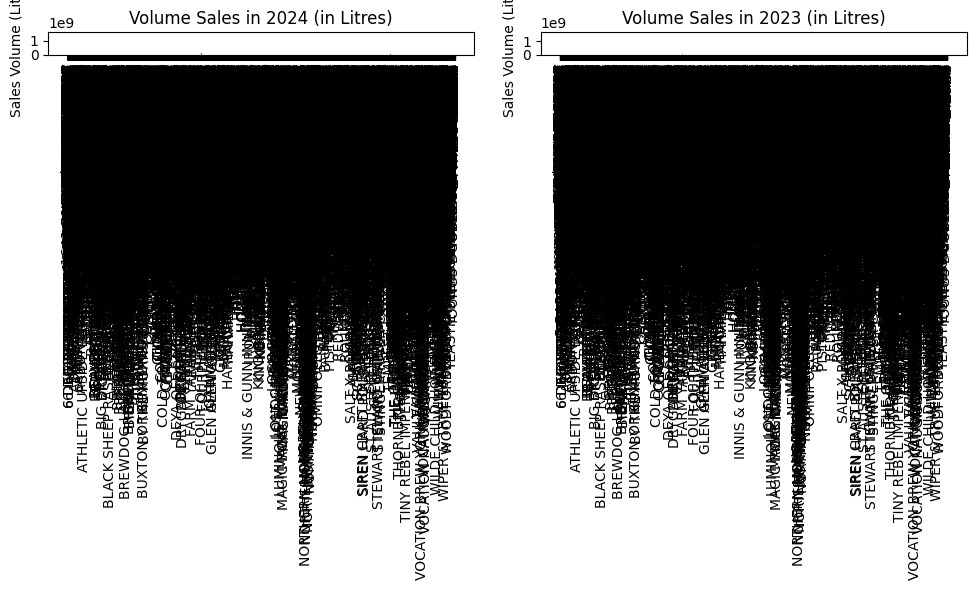

In [ ]:
import matplotlib.pyplot as plt

# Plot Volume Sales for 2024 and 2023
plt.figure(figsize=(10, 6))

# Volume sales for 2024
plt.subplot(1, 2, 1)
plt.bar(df['BRAND'], df['Volume Sales 2024'], color='b', alpha=0.7)
plt.title('Volume Sales in 2024 (in Litres)')
plt.xticks(rotation=90)
plt.ylabel('Sales Volume (Litres)')

# Volume sales for 2023
plt.subplot(1, 2, 2)
plt.bar(df['BRAND'], df['Volume Sales 2023'], color='g', alpha=0.7)
plt.title('Volume Sales in 2023 (in Litres)')
plt.xticks(rotation=90)
plt.ylabel('Sales Volume (Litres)')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the percentage change in market share from 2023 to 2024
df['Market Share Change (%)'] = ((df['Market Share 2024'] - df['Market Share 2023']) / df['Market Share 2023']) * 100

# Display the change in market share
df[['BRAND', 'Market Share Change (%)']]


,BRAND,Market Share Change (%)
0,BRAND,NaN
1,Total Beer Category,0.000000
2,05 INDIA PALE ALE,-100.000000
3,10 MOCHA PORTER,-7.387348
4,11 11 SESSION IPA,-41.953797
...,...,...
3591,ZLATY BAZANT,-91.692867
3592,ZOOM TIME,-23.740932
3593,ZUBR,1.613072
3594,ZYWIEC,-7.109054


In [ ]:
import pandas as pd

# Assuming df_cleaned has already been created and processed

# Calculate the total sales for 2024 and 2023
total_sales_2024 = df_cleaned['Volume Sales 2024'].sum()
total_sales_2023 = df_cleaned['Volume Sales 2023'].sum()

# Calculate the market share for each brand in 2024 and 2023
df_cleaned['Market Share 2024'] = df_cleaned['Volume Sales 2024'] / total_sales_2024
df_cleaned['Market Share 2023'] = df_cleaned['Volume Sales 2023'] / total_sales_2023

# Show the summary of the data with calculated market shares
df_cleaned[['BRAND', 'Volume Sales 2024', 'Market Share 2024', 'Volume Sales 2023', 'Market Share 2023']]


<ipython-input-14-0e5980f2f997>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Market Share 2024'] = df_cleaned['Volume Sales 2024'] / total_sales_2024
<ipython-input-14-0e5980f2f997>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Market Share 2023'] = df_cleaned['Volume Sales 2023'] / total_sales_2023


,BRAND,Volume Sales 2024,Market Share 2024,Volume Sales 2023,Market Share 2023
0,BRAND,NaN,NaN,NaN,NaN
2,05 INDIA PALE ALE,0.000,0.000000e+00,157.080,1.005200e-07
3,10 MOCHA PORTER,973.720,6.347099e-07,1070.960,6.853382e-07
4,11 11 SESSION IPA,2048.640,1.335386e-06,3595.020,2.300557e-06
5,11 SESSION IPA,2997.370,1.953806e-06,11.782,7.539641e-09
...,...,...,...,...,...
3591,ZLATY BAZANT,370.494,2.415029e-07,4542.966,2.907175e-06
3592,ZOOM TIME,18670.091,1.216992e-05,24938.161,1.595865e-05
3593,ZUBR,1222307.829,7.967494e-04,1225294.524,7.841013e-04
3594,ZYWIEC,582187.172,3.794930e-04,638408.599,4.085361e-04


In [ ]:
# Sorting by volume sales for both 2024 and 2023 to identify the top brands
top_brands_2024 = df_cleaned[['BRAND', 'Volume Sales 2024', 'Market Share 2024']].sort_values(by='Volume Sales 2024', ascending=False)
top_brands_2023 = df_cleaned[['BRAND', 'Volume Sales 2023', 'Market Share 2023']].sort_values(by='Volume Sales 2023', ascending=False)

# Display the top 5 brands by sales for both years
print("Top Brands in 2024 by Sales Volume:")
print(top_brands_2024.head(5))

print("\nTop Brands in 2023 by Sales Volume:")
print(top_brands_2023.head(5))

# Find the brands that have shown the most growth or decline in sales between 2023 and 2024
df_cleaned['Sales Growth'] = df_cleaned['Volume Sales 2024'] - df_cleaned['Volume Sales 2023']
df_growth = df_cleaned[['BRAND', 'Sales Growth']].sort_values(by='Sales Growth', ascending=False)

print("\nBrands with the Most Growth in Sales (2024 vs 2023):")
print(df_growth.head(5))

# Brands that saw a decline in sales
df_decline = df_cleaned[['BRAND', 'Sales Growth']].sort_values(by='Sales Growth', ascending=True)
print("\nBrands with the Most Decline in Sales (2024 vs 2023):")
print(df_decline.head(5))


Top Brands in 2024 by Sales Volume:
              BRAND  Volume Sales 2024  Market Share 2024
2876  STELLA ARTOIS       1.921409e+08           0.125245
671       BUDWEISER       1.204942e+08           0.078543
770         CARLING       1.066867e+08           0.069543
1244        FOSTERS       9.340250e+07           0.060884
2476  PRIVATE LABEL       8.384989e+07           0.054657

Top Brands in 2023 by Sales Volume:
              BRAND  Volume Sales 2023  Market Share 2023
2876  STELLA ARTOIS       2.016012e+08           0.129010
671       BUDWEISER       1.270145e+08           0.081280
770         CARLING       1.226677e+08           0.078499
1244        FOSTERS       1.067335e+08           0.068302
2476  PRIVATE LABEL       9.699216e+07           0.062068

Brands with the Most Growth in Sales (2024 vs 2023):
                  BRAND  Sales Growth
957           CRUZCAMPO  2.058468e+07
667           BUD LIGHT  8.598952e+06
779   CARLSBERG PILSNER  6.622735e+06
1538      HEINEKEN (5%)  

<ipython-input-15-a4b871ef79e8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sales Growth'] = df_cleaned['Volume Sales 2024'] - df_cleaned['Volume Sales 2023']
